---
---

## DHS2019_Cross_Validation_Part_2

---




#### PROBLEM STATEMENT

Recent years have witnessed a surge in the number of internet savvy users. Companies in the financial services domain leverage this huge internet traffic arriving at their interface by strategically placing ads/promotions for cross selling of various financial products on a plethora of web pages. The digital analytics unit of Best Cards Company uses cutting edge data science and machine learning for successful promotion of its valuable card products. They believe that a predictive model that forecasts whether a session involves a click on the ad/promotion would help them extract the maximum out of the huge clickstream data that they have collected. You are hired as a consultant to build an efficient model to predict whether a user will click on an ad or not, given the following features:

   - Clickstream data/train data for duration: (2nd July 2017 – 7th July 2017)
   - Test data for duration: (8th July 2017 – 9th July 2017)
   - User features (demographics, user behaviour/activity, buying power etc.)
   - Historical transactional data of the previous month with timestamp info (28th May 2017– 1st July 2017). This data contains actions (views/interest registered) taken by the user historically on the product page via an ad or other sources
   - Ad features (product category, webpage, campaign for ad etc.)
   - Date time features (exact timestamp of the user session)
   
   
---


***DATASET URL: https://datahack.analyticsvidhya.com/contest/workshop_amexpert-2018-machine-learning-hackathon/***

In [2]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, model_selection, metrics
%matplotlib inline

In [3]:
train_df = pd.read_csv("dataset/train_sample.csv", parse_dates=["DateTime"])
test_df = pd.read_csv("dataset/test_sample.csv", parse_dates=["DateTime"])
print(train_df.shape, test_df.shape)

(92658, 15) (128858, 14)


In [4]:
train_df["Date"] = train_df["DateTime"].dt.date
test_df["Date"] = test_df["DateTime"].dt.date

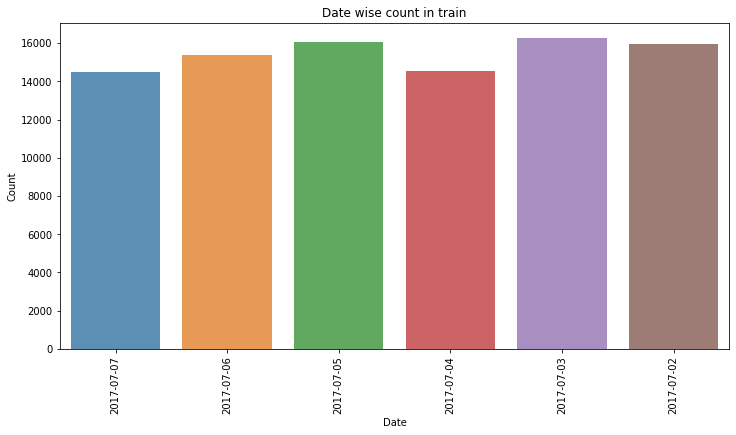

In [5]:
plt.figure(figsize=(12,6))
sns.countplot(data=train_df, x="Date", alpha=0.8)
plt.xticks(rotation='vertical')
plt.xlabel("Date")
plt.ylabel("Count")
plt.title("Date wise count in train")
plt.show()

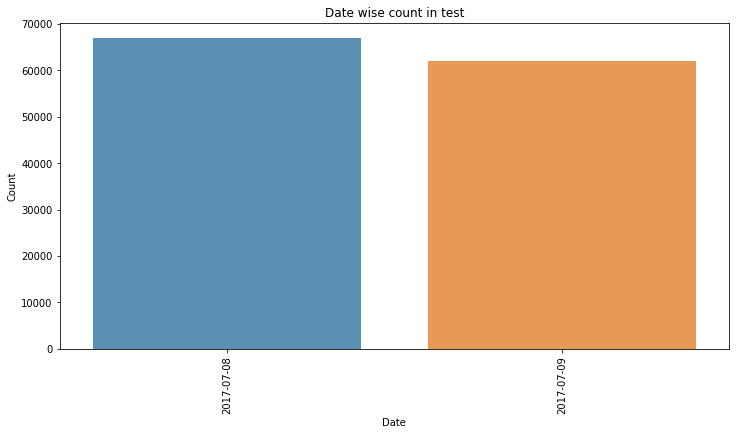

In [6]:
plt.figure(figsize=(12,6))
sns.countplot(data=test_df, x="Date", alpha=0.8)
plt.xticks(rotation='vertical')
plt.xlabel("Date")
plt.ylabel("Count")
plt.title("Date wise count in test")
plt.show()

## Cross Validation


#### Train - Test split

Do a dev - val split from train sample.

In [7]:
### EXERCISE-1
dev_dates = [datetime.date(2017, 7, 2), datetime.date(2017, 7, 3),
       datetime.date(2017, 7, 4), datetime.date(2017, 7, 5)]
val_dates = [datetime.date(2017, 7, 6), datetime.date(2017, 7, 7)]

dev_df = train_df[train_df["Date"].isin(dev_dates)]
val_df = train_df[train_df["Date"].isin(val_dates)]

print("Dev dates : ",list(dev_df["Date"].unique()))
print("Val dates : ",list(val_df["Date"].unique()))

Dev dates :  [datetime.date(2017, 7, 5), datetime.date(2017, 7, 4), datetime.date(2017, 7, 3), datetime.date(2017, 7, 2)]
Val dates :  [datetime.date(2017, 7, 7), datetime.date(2017, 7, 6)]


---

#### KFold cross validation

Do a k-fold cross validation split for the dataset.

Which K-value do you choose?

---

In [8]:
### EXERCISE-2
dates = [datetime.date(2017, 7, 2), datetime.date(2017, 7, 3),
         datetime.date(2017, 7, 4), datetime.date(2017, 7, 5),
         datetime.date(2017, 7, 6), datetime.date(2017, 7, 7)]

for date in dates:
    dev_df = train_df[train_df["Date"] != date]
    val_df = train_df[train_df["Date"] == date]
    
    print("Dev dates : ",list(dev_df["Date"].unique()))
    print("Val dates : ",list(val_df["Date"].unique()))
    print()

Dev dates :  [datetime.date(2017, 7, 7), datetime.date(2017, 7, 6), datetime.date(2017, 7, 5), datetime.date(2017, 7, 4), datetime.date(2017, 7, 3)]
Val dates :  [datetime.date(2017, 7, 2)]

Dev dates :  [datetime.date(2017, 7, 7), datetime.date(2017, 7, 6), datetime.date(2017, 7, 5), datetime.date(2017, 7, 4), datetime.date(2017, 7, 2)]
Val dates :  [datetime.date(2017, 7, 3)]

Dev dates :  [datetime.date(2017, 7, 7), datetime.date(2017, 7, 6), datetime.date(2017, 7, 5), datetime.date(2017, 7, 3), datetime.date(2017, 7, 2)]
Val dates :  [datetime.date(2017, 7, 4)]

Dev dates :  [datetime.date(2017, 7, 7), datetime.date(2017, 7, 6), datetime.date(2017, 7, 4), datetime.date(2017, 7, 3), datetime.date(2017, 7, 2)]
Val dates :  [datetime.date(2017, 7, 5)]

Dev dates :  [datetime.date(2017, 7, 7), datetime.date(2017, 7, 5), datetime.date(2017, 7, 4), datetime.date(2017, 7, 3), datetime.date(2017, 7, 2)]
Val dates :  [datetime.date(2017, 7, 6)]

Dev dates :  [datetime.date(2017, 7, 6), date